In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)
import scipy.stats as stats
import math

# 2. Overview of Supervised Learning

## 2.3 Prediction Least Squares to Nearest Neighbors

### 2.3.1 Linear Models and Least Squares
- N factors = N dim linear model = N+1 coefficient if bias included.
- invert : min(Norm(predictions(sample)-outcomes),coefficients)

### 2.3.2 Nearest-Neighbor Methods
* simple average of nearest K (e.g. euclidean norm)
* 1-NN => voronoi tesselation

### 2.3.3 From Least Squares to Nearest Neighbors
* LLS == low variance high bias - best for linear real models
* kNN == high variance low bias - fits any real model
* kNN and linear regression have biggest market share.
* kNN can be smoothed with kernels, perhaps assymetric
* kNN enhanced by kernel method weighting (different in different dimensions)
* LLS enhanced by weighting, basis functions, non-linear transformation of linear function.
* Neural network and projection pursuit models are sums of non-linear transformation of linear functions.

## 2.4 Statistical Decision Theory
* in input space X, output space Y with joint distribution Pr(X,Y)
  * estimate a *prediction function* $f:X \Rightarrow Y$
  * *loss function* L(Y,f(X)) usually L2-norm : $ (Y - F(X))^{2} $  
  * *expected prediction error* $ EPE(f)= E_{X,Y}(Y-f(X))^2 = E_{X}E_{X|Y}((Y-f(X))^{2}|X) = \int|y-f(x)|^{2}Pr(dx,dy)$
  * [conditional expectation](http://math.tntech.edu/machida/4470/booklet/booklet/node21.html) is the best (minimizing pointwise) prediction function under L2-norm.
* $ f(x) = argmin_{c} E_{X|Y}((Y - f(X))^{2}|X) = E(Y|X = x) $
* many methods to calculated this expectation
  * integrate Y over the conditional distribution $E(Y|X)$ 
    * $ \hat{f}(x) = \int f(y) Pr(dy|x) $
    * e.g. [financial derivatives valuation (under risk neutral probability)](https://en.wikipedia.org/wiki/Valuation_of_options#Pricing_models) or [real option valuation(under objective probability)](https://en.wikipedia.org/wiki/Real_options_valuation)
    * but there are simpler (short-cut) predictors which don't model the marginal distribution Pr(Y|X) even theoretically in the way that the Black-Scholes "expiry price (Y) predictor" does in the derivation of it's formula ( even though it might not be obvious using the formula.)     
  * **k-nearest neighbour** approximates conditional expectation by local(~conditioned) average(~expecation) 
    * $ \hat{f}(x) = Ave(y_{i}| x_{i} \in N_{k}(x) ) $
    * under mild regularity of Pr(X,Y) [can show](http://cseweb.ucsd.edu/~dasgupta/papers/nn-rates.pdf) $N,k\to\infty$ , $k/N\to0$ , $\hat{f}(x) \to E(Y|X=x)$
    * good for locally constant function
    * curse of dimensionality reduces the above rate of convergence
  * **linear regression** assumes predictor is linear $ f(x) \approx x^{T} \beta $
	* $ \beta = ( E( X X^T ) )^{-1} E(XY) $
	* *not* conditioning on X but polling values over X
* categorical output variable G
 * loss function is K x K matrix (often choose 0-1) L(k,l)=cost of classifying G_{k} as G_{l}
 * $ EPE = E[L(G,\hat{G}(X))] = E_{X} \Sigma^{K}_{k=1} L[G_{k},\hat{G}(X) ] Pr ( G_{k} | X ) $
 * *classification function*: $ \hat{G}(x) = argmin_{g \in \mathcal{G} } \Sigma^{K}_{k=1} L[G_{k},g] Pr(G_{k}|X=x)$
	* zero-one loss function gives the **Bayes classifier** 
      * $ \hat{G}(x) = argmin_{g \in \mathcal{G}}[1-Pr(g|X=x)] $
      * $ \hat{G}(x) = \mathcal{G}_{k} if Pr(\mathcal{G}_{k}|X=x) = \max_{g \in \mathcal{G}} Pr(g|X=x) $
      * the most probable class using conditional discrete distrbution.
    * dummy-variable regression procedure then classification to the largest fitted value, is another way of representing Bayes classifier

## 2.5 Local Methods in High Dimensions
* stable but biased linear model, or less stable but less biased kNN.
* with large enough N can approximate expectation with kNN.
* curse of dimensionality
  * edge length for fraction *r* of unit cube : $e_{p}(r) = r^{1/p}$
  * reducing r increases variance
* sampling density $\alpha\text{ }N^{1/p}$ => in high diensions training smaples sparsely populate input space.
* compute expected prediction error
$$
\begin{align} 
MSE(x_{0}) &= E_{\mathcal{T}}[f(x_{0}) - \hat{y_{0}}]^{2} \\
&= E_{\mathcal{T}}[\hat{y_{0}} - E_{\mathcal{T}}(\hat{y_{0}})]^{2} + E_{\mathcal{T}}[E_{\mathcal{T}}(\hat{y_{0}}) - f(x_{0})]^{2} \\
&= Var_{\mathcal{T}}(\hat{y_{0}}) - {Bias}^{2}(\hat{y_{0}})
\end{align}
$$
* as dimension increases, nearest neighbourhood of a point at certian of domain increases a lot. 

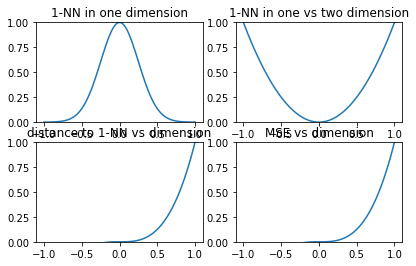

In [4]:
x = np.linspace(-1,1,100);
plt.title('Y vs X')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()

ax = plt.subplot(2,2,1)
ax.set_autoscaley_on(False)
y = np.exp(-8*x**2)
plt.title('1-NN in one dimension')
plt.plot(x,y)

ax = plt.subplot(2,2,2)
ax.set_autoscaley_on(False)
y = x**2
plt.title('1-NN in one vs two dimension')
plt.plot(x,y)

ax = plt.subplot(2,2,3)
ax.set_autoscaley_on(False)
y = x**3
plt.title('distance to 1-NN vs dimension')
plt.plot(x,y)

ax = plt.subplot(2,2,4)
ax.set_autoscaley_on(False)
y = x**3
plt.title('MSE vs dimension')
plt.plot(x,y)

* if the dimension of the input space is high, the nearest neighbors need not be close to the target point, and can result in large errors
* if special structure is known to exist, this can be used to reduce both the bias and the variance of the estimates.
* if high dimensions sample points tend to be near boundaries, prediciton is harder because extrapolatio needed.

MSE broken down into variance and squared bias. We need size of training data to grow with the complexity of the function.

$$
\begin{equation}
\begin{split}
MSE(x_{0}) & = E_{\tau}[f(x_{0}) - \hat{y}_{0}]^{2} \\
           & = E_{\tau}[\hat{y}_{0}^{2} - E_{\tau}(\hat{y}_{0}) + E_{\tau}(\hat{y}_{0}) + f(x_{0})^{2} ]^{2} \\
           & = E_{\tau}[\hat{y}_{0} - E_{\tau}\hat{y}_{0}]^2+
               2 E_{\tau}[ (\hat{y}_{0} - E_{\tau}\hat{y}_{0})(E_{\tau}\hat{y}_{0}-f(x_{0}) )]+
               E_{\tau}[E_{\tau}\hat{y}_{0}-f(x_{0})]^2 \\
           & = E_{\tau}[\hat{y}_{0} - E_{\tau}\hat{y}_{0}]^2 +
               [E_{\tau}\hat{y}_{0}-f(x_{0})]^2 \\
           & = Var_{\tau}(\hat{y}_{0}) + Bias^2(\hat{y}_{0})    
\end{split}
\end{equation}
$$

By imposing heavy restrictions on class of models being fitted we can avoid dimensionlaity curse. Bias term doesn't always dominate with 1 nearest neighbour. e.g. given model  $ Y = X^{T} \beta + \epsilon $ where $  \epsilon \sim N(0,\sigma^2) $, and fit the model by least squares to the training data. 

$$
\begin{equation}
\begin{split}
EPE(x_{0}) & = E_{y_{0}|x_{0}} E_{\tau} ( y_{0} - \hat{y}_{0} )^2 \\
           & = Var_{y_{0}|x_{0}} + 
               E_{\tau}( y_{0} - E_{\tau}\hat{y}_{0} )^2 + 
               [ E_{\tau}( y_{0} - {x}_{0}^{T}\beta ]^2 \\
           & = Var_{y_{0}|x_{0}} + Var_{\tau}(\hat{y}_{0}) + 
               Bias^2( y_{0}) 
           & = E_{y_{0}|x_{0}} E_{\tau} ( y_{0} - \hat{y}_{0} )^2 \\
\end{split}
\end{equation}
$$




## 2.6 Statistical Models, Supervised Learning and Function Approximation
### 2.6.1 A Statistical Model for the Joint Distribution Pr(X,Y)
### 2.6.2 Supervised Learning
### 2.6.3 Function Approximation

## 2.7 Structured Regression Models
### 2.7.1 Difficulty of the Problem

## 2.8 Classes of Restricted Estimators
### 2.8.1 Roughness Penalty and Bayesian Methods
### 2.8.2 Kernel Methods and Local Regression
### 2.8.3 Basis Functions and Dictionary Methods

## 2.9 Model Selection and the Bias–Variance Tradeoff


# 3 Linear Methods for Regression
## 3.1 Introduction
## 3.2 Linear Regression Models and Least Squares
### 3.2.1 Example: Prostate Cancer
### 3.2.2 The Gauss–Markov Theorem
### 3.2.3 Multiple Regression from Simple Univariate Regression
### 3.2.4 Multiple Outputs
## 3.3 Subset Selection
### 3.3.1 Best-Subset Selection
### 3.3.2 Forward- and Backward-Stepwise Selection
### 3.3.3 Forward-Stagewise Regression
### 3.3.4 Prostate Cancer Data Example (Continued)
## 3.4 Shrinkage Methods
### 3.4.1 Ridge Regression
### 3.4.2 The Lasso
### 3.4.3 Discussion: Subset Selection, Ridge Regression and the Lasso
### 3.4.4 Least Angle Regression
## 3.5 Methods Using Derived Input Directions
### 3.5.1 Principal Components Regression
### 3.5.2 Partial Least Squares
## 3.6 Discussion: A Comparison of the Selection and Shrinkage Methods
## 3.7 Multiple Outcome Shrinkage and Selection
## 3.8 More on the Lasso and Related Path Algorithms
### 3.8.1 Incremental Forward Stagewise Regression
### 3.8.2 Piecewise-Linear Path Algorithms
### 3.8.3 The Dantzig Selector
### 3.8.4 The Grouped Lasso
### 3.8.5 Further Properties of the Lasso
### 3.8.6 Pathwise Coordinate Optimization
## 3.9 Computational Considerations

# 4 Linear Methods for Classification
## 4.1 Introduction
* partition $G(x)$ into regions with linear decision boundaries
* classify to largest discriminant $f_{k}(x)$ interpreted as *posterior probability* Pr(G=k∣X=x)
* we only require a **montone transform of Pr(G=k∣X=x) to be linear**
  * e.g. with transform $Logit(p)=log(p/(1-p))=\beta_{0}+\beta^{T}x$ 
  * $ Pr(G=1|X=x) = \frac{exp(\beta_{0}+\beta^{T}x)}{1+exp(\beta_{0}+\beta^{T}x)} $
  * linear decision boundary $ \beta_{0}+\beta^{T}x = 0 $
* explicitly model the linear boundary.
  * Rosenblatt **perceptron** - find separating hyperplane in training data
  * or Vapnik **optimally separating hyperplane**
* generalizations
  * expand variable set with p(p+1)/2 squares and cross-products
  * any non-linear any basis transformation

## 4.2 Linear Regression of an Indicator Matrix
* *y* - K class as binay (0,1) k-vector
* *Y* - N x K indicator response matrix
* *X* - N x (p+1) model matrix,  (p inputs + column of 1’s for constant term)
* *B* - train (p+1) x K coefficient matrix $ B = (X^{T}X)^{-1}X^{T}Y $
* predict indicator K-vector $ \hat{f}(x) = [(1,x)B]^{T} $
* classify to class k with largest $\hat{f}_{k}$
  * $ \hat{G}(x) = { argmax }_{k \in \mathcal{G} } {\hat{f}_{k}}(x) $
* view $\hat{f}(x)$ as estimate of $ E(Y_{k}∣X=x)=Pr(G=k∣X=x)$
* use non-linear basis functions for consistent probabilities
* add more basis functions so that we approach conditional expectation
* closest target classification allows probability to sum to one
  * fit linear model directly minimizing over all B
  * the class is given by the $t_{k}$ closest to $\hat{f}(x)$ from B above.    
* because of rigid nature of regression some classes mask others when K >> p
  
## 4.3 Linear Discriminant Analysis
* for optimal classificaton we need class posteriors
  * $f_{k}$ is class conditional density of X in class G=k
  * $\pi_{k}$ is [prior probability](https://en.wikipedia.org/wiki/Prior_probability) of class k
  * Pr(G=k|X=x) from priors and class conditional via Bayes theorem
* techniques are based on models for the class densities
  * linear and quadratic discriminant analysis use Gaussian densities
  * mixtues of Gaussians allow nonlinar decsion boundaries (6.8)
  * most flexible are non-parametric densities
  * **Naive Bayes** assume inputs are conditionally independent in each class
    * i.e. class densities are products of marginal densities


### 4.3.1 Regularized Discriminant Analysis

### 4.3.2 Computations for LDA

### 4.3.3 Reduced-Rank Linear Discriminant Analysis

## 4.4 Logistic Regression

### 4.4.1 Fitting Logistic Regression Models

### 4.4.3 Quadratic Approximations and Inference

### 4.4.4 L1 Regularized Logistic Regression

### 4.4.5 Logistic Regression or LDA ?
* the log-posterior odds between class k and K due to Gaussian class densities.
* 

## 4.5 Separating Hyperplanes

### 4.5.1 Rosenblatt’s Perceptron Learning Algorithm

## 4.5.2 Optimal Separating Hyperplanes



# 5 Basis Expansions and Regularization
## 5.1 Introduction
### 5.2 Piecewise Polynomials and Splines
### 5.2.1 Natural Cubic Splines
### 5.2.2 Example: South African Heart Disease (Continued)
### 5.2.3 Example: Phoneme Recognition
## 5.3 Filtering and Feature Extraction
## 5.4 Smoothing Splines
### 5.4.1 Degrees of Freedom and Smoother Matrices
## 5.5 Automatic Selection of the Smoothing Parameters
### 5.5.1 Fixing the Degrees of Freedom
### 5.5.2 The Bias–Variance Tradeoff
## 5.6 Nonparametric Logistic Regression
## 5.7 Multidimensional Splines
## 5.8 Regularization and Reproducing Kernel Hilbert Spaces
### 5.8.1 Spaces of Functions Generated by Kernels
### 5.8.2 Examples of RKHS
## 5.9 Wavelet Smoothing
### 5.9.1 Wavelet Bases and the Wavelet Transform
### 5.9.2 Adaptive Wavelet Filtering
## Appendix: Computational Considerations for Splines
## Appendix: B-splines
## Appendix: Computations for Smoothing Splines


# 6 Kernel Smoothing Methods
## 6.1 One-Dimensional Kernel Smoothers
### 6.1.1 Local Linear Regression
### 6.1.2 Local Polynomial Regression
## 6.2 Selecting the Width of the Kernel
## 6.3 Local Regression in R^p
## 6.4 Structured Local Regression Models in R^p
### 6.4.1 Structured Kernels
### 6.4.2 Structured Regression Functions
## 6.5 Local Likelihood and Other Models
## 6.6 Kernel Density Estimation and Classification
### 6.6.1 Kernel Density Estimation
### 6.6.2 Kernel Density Classification
### 6.6.3 The Naive Bayes Classifier
## 6.7 Radial Basis Functions and Kernels
## 6.8 Mixture Models for Density Estimation and Classification
## 6.9 Computational Considerations



# 9 Additive Models, Trees, and Related Methods
## 9.1 Generalized Additive Models
### 9.1.1 Fitting Additive Models
### 9.1.2 Example: Additive Logistic Regression
### 9.1.3 Summary
## 9.2 Tree-Based Methods
### 9.2.1 Background
### 9.2.2 Regression Trees
### 9.2.3 Classification Trees
### 9.2.4 Other Issues
### 9.2.5 Spam Example (Continued)
## 9.3 PRIM: Bump Hunting
### 9.3.1 Spam Example (Continued)
## 9.4 MARS: Multivariate Adaptive Regression Splines
### 9.4.1 Spam Example (Continued)
### 9.4.2 Example (Simulated Data)
### 9.4.3 Other Issues
## 9.5 Hierarchical Mixtures of Expert
## 9.6 Missing Data
## 9.7 Computational Considerations



# 10 Boosting and Additive Trees
## 10.1 Boosting Methods
### 10.1.1 Outline of This Chapter
## 10.2 Boosting Fits an Additive Model
## 10.3 Forward Stagewise Additive Modeling
## 10.4 Exponential Loss and AdaBoost
## 10.5 Why Exponential Loss?
## 10.6 Loss Functions and Robustness
## 10.7 “Off-the-Shelf” Procedures for Data Mining
## 10.8 Example: Spam Data
## 10.9 Boosting Trees
## 10.10 Numerical Optimization via Gradient Boosting
### 10.10.1 Steepest Descent
### 10.10.2 Gradient Boosting
### 10.10.3 Implementations of Gradient Boosting
## 10.11 Right-Sized Trees for Boosting
## 10.12 Regularization
### 10.12.1 Shrinkage
### 10.12.2 Subsampling
## 10.13 Interpretation
### 10.13.1 Relative Importance of Predictor Variables
### 10.13.2 Partial Dependence Plots
## 10.14 Illustrations
### 10.14.1 California Housing
### 10.14.2 New Zealand Fish
### 10.14.3 Demographics Data


# 11 Neural Networks

## 11.1 Introduction

* extract linear combinations of the inputs as derived features, and then model the target as a nonlinear function of these features.

## 11.2 Projection Pursuit Regression

* basic PPR model is $ f(X) = \sum_{m=1}^{M} g_{m}(\omega_{m}^{T}X) $
* $ \omega_{m} $ are unit vectors
* $ g_{m}(\omega_{m}^{T}X) $ is called a *ridge function*
* class of non-linear function of linear combinations is very large
	* e.g. $ X_{1} . X_{2} = [ ( X_{1}+X_{2})^2 - (X_{1}-X_{2})^2 ]/4 $
* if M arbitrarily large, PPR functions are a *universal approximator* in $ R^{N} $
* but interepratation is difficult because of how inputs enter the model (aprt from M=1).
* fit by minimizing $ \sum_{i=1}^{N} [  y_{i} - \sum_{m=1}^{M} g_{m}(\omega_{m}^{T}x_{i}) ] $
* constrain $ g_{m} $ to overvoid overfitting
* one dimensional smoothing such as spline on $ v_{i} = \omega^{T} x_{i} $, solving for $\omega^{T}$ and g simultaneously
* important implementation details in the  $ \omega^{T} and g $ iteration
	* good if smoothing method has derivatives e.g. spline
	* at each step can readjust the $g_{m}$ from previous step
	* usually $ \omega_{m} $ are nto readjusted
	* M usually estimated in forward stage-wise 
		* top adding terms when fit not improved
		* or use cross-validation
		
## 11.3 Neural Networks

* vanilla NN == single hiddlen layer back propagation == single layer perceptron
* $ f_{k}(X) = g_{k}(T), k = 1,..,K $
	* $ T_{k} = \beta_{0k} + \beta^{T}_{k}Z , k = 1,..,K $
	* $ Z_{m} = \sigma(\alpha_{0m} + \alpha^{T}_{m}X), m = 1,..,M $
		* basis expansion of X
* activation function
	* sigmoid $ 1/(1 + e^{-v}) $
* $ g_{k}(T) $ 
	* for classifcation use $ g_{k}(T) = \frac{e^{T_{k}}}{ \sum_{l=1}^{K} e^{T_{k}} } $
* if $ \sigma $ is identity then whole model is linear
* rate of activation depends on $ \| \alpha_{m} \| $

## 11.4 Fitting Neural Networks
Complete set of weights $\theta$
* ${ \alpha_{0m},\alpha_{m} ; m =1,2,..,M }$ M(p+1) weights,
* ${ \beta_{0k} ,\beta_{k}  ; m =1,2,..,M }$ K(M+1) weights,
* $ R(\theta) = 


## 11.5 Some Issues in Training Neural Networks
### 11.5.1 Starting Values
### 11.5.2 Overfitting
### 11.5.3 Scaling of the Inputs
### 11.5.4 Number of Hidden Units and Layers
### 11.5.5 Multiple Minima
## 11.6 Example: Simulated Data
## 11.7 Example: ZIP Code Data
## 11.8 Discussion
## 11.9 Bayesian Neural Nets and the NIPS 2003 Challenge
### 11.9.1 Bayes, Boosting and Bagging
### 11.9.2 Performance Comparisons
## 11.10 Computational Considerations


# 13 Prototype Methods and Nearest-Neighbors

## 13.1 Introduction
* model free mehtods for classification and pattenr recognition
* unstructured => not useful understanding of features,outcome relationship.
* NN for regression OK for lo-dim but in hi-dim bias-var tradeoff ot as good as for classification

## 13.2 Prototype Methods
* training data (x_i,g_i)
* prototypes = set of points in feature space with class label [1,K]
* x classified by closest prototype in normalized (feature_i ~ moments(0,1)) feature space
* position prototypes to capture class distribution, good for irregular class boundaries
* main challenge is how many prototypes

### 13.2.1 K-means Clustering
### 13.2.2 Learning Vector Quantization
### 13.2.3 Gaussian Mixtures
## 13.3 k-Nearest-Neighbor Classifiers
### 13.3.1 Example: A Comparative Study
### 13.3.2 Example: k-Nearest-Neighbors and Image Scene Classification
### 13.3.3 Invariant Metrics and Tangent Distance
## 13.4 Adaptive Nearest-Neighbor Methods
### 13.4.1 Example
### 13.4.2 Global Dimension Reduction for Nearest-Neighbors
## 13.5 Computational Considerations



# 14 Unsupervised Learning
## 14.1 Introduction
* Supervised learning - Pr(X,Y) = Pr(Y|X).Pr(X) , focuses on Pr(Y|X) 	
	* location is of main interest: $ \mu(x) = argmin_{\hat{Y}}  E_{Y|X}L(Y,\hat{Y}) $
	* cross validated
* Unsupervised learning - estimate Pr(X)
	* often high dimensional with more than location estimates.
	* can't validate
	* when p<=3 there are some nonparametric methods which work

## 14.2 Association Rules
* find conjunctive rules in speical case of very high dimensional binary valued data
* find joint values of X which occur frequently usually where $ X_{j} \in {0,1} $
* seek regions of X-space (or prototype X-values  v_{1},...v_{L}) which are high probability relaitve to support
* generally for $ X_{j} \in S_{j} $ (its support) and $ s_{j} \subset S_{j} $ conjunctive rule is to find $s_{j}$ with large $ Pr [{\bigcap}_{i=0}^k ( X_{j} \in s_{j} )]$

### 14.2.1 Market Basket Analysis
* for large databases ($ p \approx 10^{4}  N \approx 10^8 $) need to simplify:
	* consider only 2 types of subset:
		* $S_{j}$ consists of single value of X_{j}: $S_{j} = v_{0j}$, or
		* $S_{j}$ consists of all values of X_{j} can assume: $s_{j} = S_{j}$
	* simplies to finding $J \in {1,..p}$ and corresponding $v_{0j}, j \in J $ s.t.$ Pr[ {\bigcap}_{j \in J} (X_{j} = v_{0j}) ] $ is large.
	* using *dummy variables* to transform into binary variables $Z_{1}..Z_{K}$ where $ K = \sum_{j=1}^{p} = |S_{j}| $ .
	* find *item set* $ K \in {1,..K} $ s.t. $Pr [ \prod_{k \in K}X_{k} = 1 ] \approx \frac{1}{N} \sum_{i=1}^{N}\prod_{k \in K} z_{ik} $ is large.

### 14.2.2 The Apriori Algorithm

### 14.2.3 Example: Market Basket Analysis

### 14.2.4 Unsupervised as Supervised Learning
* transform density estimation into supervised function approximation
  * g(x) is unknown probability density to be estimated
  * $g_{0}(x)$ is a reference density e.g. uniform
  * $x_{1} ..x_{N}$ are i.i.d. random sample drawn from g(x)
  * draw $N_{0}$ size sample from $g_{0}(x)$
  * use mixture density $(g(x)+g_{0}(x))/2$
  * 
### 14.2.5 Generalized Association Rules  
### 14.2.6 Choice of Supervised Learning Method
### 14.2.7 Example: Market Basket Analysis (Continued)
## 14.3 Cluster Analysis
### 14.3.1 Proximity Matrices
### 14.3.2 Dissimilarities Based on Attributes
### 14.3.3 Object Dissimilarity
### 14.3.4 Clustering Algorithms
### 14.3.5 Combinatorial Algorithms
### 14.3.6 K-means
### 14.3.7 Gaussian Mixtures as Soft K-means Clustering
### 14.3.8 Example: Human Tumor Microarray Data
### 14.3.9 Vector Quantization
### 14.3.10 K-medoids
### 14.3.11 Practical Issues
### 14.3.12 Hierarchical Clustering
## 14.4 Self-Organizing Maps

## 14.5 Principal Components, Curves and Surfaces
* sequence of projections of the data, mutually uncorrelated and ordered in variance
* PCA as linear manifolds approximating a set of N points $X_{i} \in p$.

### 14.5.1 Principal Components


### 14.5.2 Principal Curves and Surfaces
### 14.5.3 Spectral Clustering
### 14.5.4 Kernel Principal Components
### 14.5.5 Sparse Principal Components
## 14.6 Non-negative Matrix Factorization
### 14.6.1 Archetypal Analysis
## 14.7 Independent Component Analysis and Exploratory Projection Pursuit
### 14.7.1 Latent Variables and Factor Analysis
### 14.7.2 Independent Component Analysis
### 14.7.3 Exploratory Projection Pursuit
### 14.7.4 A Direct Approach to ICA
## 14.8 Multidimensional Scaling
## 14.9 Nonlinear Dimension Reduction and Local Multidimensional Scaling
## 14.10 The Google PageRank Algorithm


# 15 Random Forests
## 15.1 Introduction
## 15.2 Definition of Random Forests
## 15.3 Details of Random Forests
### 15.3.1 Out of Bag Samples
### 15.3.2 Variable Importance
### 15.3.3 Proximity Plots
### 15.3.4 Random Forests and Overfitting
## 15.4 Analysis of Random Forests
### 15.4.1 Variance and the De-Correlation Effect
### 15.4.2 Bias
### 15.4.3 Adaptive Nearest Neighbors


# 16 Ensemble Learning
* Combine base models
* Bagging and random forests are ensemble classification methods where committee of trees each vote.
* Boosting is similar but
## 16.1
## 16.2 Boosting and Regularization Paths
### 16.2.1 Penalized Regression
### 16.2.2 The “Bet on Sparsity” Principle
### 16.2.3 Regularization Paths, Over-fitting and Margins
## 16.3 Learning Ensembles
### 16.3.1 Learning a Good Ensemble
### 16.3.2 Rule Ensembles



# 17 Undirected Graphical Models
## 17.1 Introduction
* also called *Markov fields* or *Markov networks*
* each node is an RV, no edge between nodes ~ RV's conditionally indep given the other nodes.
* edges parameterized by potentials
* model selection == graph structure
* learning == estimation of the edge parameters from data
* inference == computation of marginal node probabilities, from their joint distribution.
* Bayseian networks == DAGs. Distributions can be factored into conditionals => casual interpretations.
## 17.2 Markov Graphs and Their Properties
## 17.3 Undirected Graphical Models for Continuous Variables
### 17.3.1 Estimation of the Parameters when the Graph Structure is Known
### 17.3.2 Estimation of the Graph Structure
### 17.4 Undirected Graphical Models for Discrete Variables
#### 17.4.1 Estimation of the Parameters when the Graph Structure is Known
#### 17.4.2 Hidden Nodes
#### 17.4.3 Estimation of the Graph Structure
#### 17.4.4 Restricted Boltzmann Machines


# 18 High-Dimensional Problems: p ≫ N
## 18.1 When p is Much Bigger than N
* high variance and overfitting => simple highly regularized fitting

## 18.2 Diagonal Linear Discriminant Analysis and Nearest Shrunken Centroids

## 18.3 Linear Classifiers with Quadratic Regularization

### 18.3.1 Regularized Discriminant Analysis

### 18.3.2 Logistic Regression with Quadratic Regularization

### 18.3.3 The Support Vector Classifier

### 18.3.4 Feature Selection

### 18.3.5 Computational Shortcuts When p ≫ N

## 18.4 Linear Classifiers with L1 Regularization
### 18.4.1 Application of Lasso to Protein Mass Spectroscopy
### 18.4.2 The Fused Lasso for Functional Data
## 18.5 Classification When Features are Unavailable
### 18.5.1 Example: String Kernels and Protein Classification
### 18.5.2 Classification and Other Models Using Inner-Product Kernels and Pairwise Distances
### 18.5.3 Example: Abstracts Classification
## 18.6 High-Dimensional Regression: Supervised Principal Components
### 18.6.1 Connection to Latent-Variable Modeling
### 18.6.2 Relationship with Partial Least Squares
### 18.6.3 Pre-Conditioning for Feature Selection
## 18.7 Feature Assessment and the Multiple-Testing Problem
### 18.7.1 The False Discovery Rate
### 18.7.2 Asymmetric Cutpoints and the SAM Procedure
### 18.7.3 A Bayesian Interpretation of the FDR



In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()